## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  52.247865  1660.068172  0.090418   8.684320  1.312376
1  35.721631   435.601037  0.582300   8.142584  1.375622
2  51.577359  1177.473808  0.503489   4.651793  1.467343
3  24.064201   726.819580  0.775837   8.164334  1.479460
4  68.255498  1736.053014  0.512168  10.847873  1.570652


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0163792	total: 67.7ms	remaining: 1m 7s
1:	learn: 1.0083296	total: 68.3ms	remaining: 34.1s
2:	learn: 1.0009319	total: 68.9ms	remaining: 22.9s
3:	learn: 0.9918157	total: 69.3ms	remaining: 17.3s
4:	learn: 0.9815849	total: 69.7ms	remaining: 13.9s
5:	learn: 0.9713590	total: 70.4ms	remaining: 11.7s
6:	learn: 0.9623529	total: 70.8ms	remaining: 10.1s
7:	learn: 0.9528477	total: 71.3ms	remaining: 8.84s
8:	learn: 0.9444329	total: 71.8ms	remaining: 7.9s
9:	learn: 0.9359582	total: 72.3ms	remaining: 7.15s
10:	learn: 0.9279027	total: 72.7ms	remaining: 6.53s
11:	learn: 0.9206327	total: 73.2ms	remaining: 6.03s
12:	learn: 0.9118302	total: 73.6ms	remaining: 5.59s
13:	learn: 0.9037200	total: 74ms	remaining: 5.21s
14:	learn: 0.8957803	total: 74.5ms	remaining: 4.89s
15:	learn: 0.8889208	total: 74.9ms	remaining: 4.61s
16:	learn: 0.8813654	total: 75.5ms	remaining: 4.36s
17:	learn: 0.8741942	total: 76ms	remaining: 4.14s
18:	learn: 0.8679917	total: 76.4ms	remaining: 3.9

84:	learn: 0.5265228	total: 109ms	remaining: 1.18s
85:	learn: 0.5231608	total: 110ms	remaining: 1.17s
86:	learn: 0.5201811	total: 110ms	remaining: 1.16s
87:	learn: 0.5161062	total: 110ms	remaining: 1.14s
88:	learn: 0.5128419	total: 111ms	remaining: 1.13s
89:	learn: 0.5100794	total: 111ms	remaining: 1.12s
90:	learn: 0.5067071	total: 112ms	remaining: 1.12s
91:	learn: 0.5031890	total: 112ms	remaining: 1.11s
92:	learn: 0.4999202	total: 112ms	remaining: 1.1s
93:	learn: 0.4963623	total: 113ms	remaining: 1.09s
94:	learn: 0.4929140	total: 113ms	remaining: 1.08s
95:	learn: 0.4902128	total: 114ms	remaining: 1.07s
96:	learn: 0.4880049	total: 114ms	remaining: 1.06s
97:	learn: 0.4843038	total: 114ms	remaining: 1.05s
98:	learn: 0.4821633	total: 115ms	remaining: 1.04s
99:	learn: 0.4794600	total: 115ms	remaining: 1.04s
100:	learn: 0.4762052	total: 116ms	remaining: 1.03s
101:	learn: 0.4735218	total: 116ms	remaining: 1.02s
102:	learn: 0.4703340	total: 117ms	remaining: 1.01s
103:	learn: 0.4674561	total: 

264:	learn: 0.2039970	total: 187ms	remaining: 518ms
265:	learn: 0.2027523	total: 188ms	remaining: 517ms
266:	learn: 0.2017440	total: 188ms	remaining: 516ms
267:	learn: 0.2005311	total: 189ms	remaining: 515ms
268:	learn: 0.1997510	total: 189ms	remaining: 513ms
269:	learn: 0.1986128	total: 189ms	remaining: 512ms
270:	learn: 0.1973859	total: 190ms	remaining: 510ms
271:	learn: 0.1967938	total: 190ms	remaining: 509ms
272:	learn: 0.1956116	total: 191ms	remaining: 508ms
273:	learn: 0.1948872	total: 191ms	remaining: 506ms
274:	learn: 0.1935910	total: 191ms	remaining: 504ms
275:	learn: 0.1924194	total: 192ms	remaining: 503ms
276:	learn: 0.1914421	total: 192ms	remaining: 502ms
277:	learn: 0.1903714	total: 193ms	remaining: 500ms
278:	learn: 0.1891642	total: 193ms	remaining: 499ms
279:	learn: 0.1885335	total: 194ms	remaining: 498ms
280:	learn: 0.1877736	total: 194ms	remaining: 497ms
281:	learn: 0.1871426	total: 195ms	remaining: 496ms
282:	learn: 0.1860972	total: 195ms	remaining: 494ms
283:	learn: 

497:	learn: 0.0840915	total: 292ms	remaining: 294ms
498:	learn: 0.0838650	total: 292ms	remaining: 293ms
499:	learn: 0.0837365	total: 293ms	remaining: 293ms
500:	learn: 0.0835155	total: 293ms	remaining: 292ms
501:	learn: 0.0831765	total: 294ms	remaining: 291ms
502:	learn: 0.0830514	total: 294ms	remaining: 291ms
503:	learn: 0.0829497	total: 295ms	remaining: 290ms
504:	learn: 0.0827283	total: 295ms	remaining: 289ms
505:	learn: 0.0824508	total: 296ms	remaining: 289ms
506:	learn: 0.0822338	total: 296ms	remaining: 288ms
507:	learn: 0.0819660	total: 297ms	remaining: 287ms
508:	learn: 0.0817030	total: 297ms	remaining: 286ms
509:	learn: 0.0813410	total: 297ms	remaining: 286ms
510:	learn: 0.0812309	total: 298ms	remaining: 285ms
511:	learn: 0.0808782	total: 298ms	remaining: 284ms
512:	learn: 0.0804993	total: 299ms	remaining: 284ms
513:	learn: 0.0804009	total: 299ms	remaining: 283ms
514:	learn: 0.0800568	total: 300ms	remaining: 282ms
515:	learn: 0.0799600	total: 300ms	remaining: 282ms
516:	learn: 

668:	learn: 0.0559664	total: 369ms	remaining: 183ms
669:	learn: 0.0558291	total: 370ms	remaining: 182ms
670:	learn: 0.0556951	total: 370ms	remaining: 182ms
671:	learn: 0.0556387	total: 371ms	remaining: 181ms
672:	learn: 0.0555993	total: 371ms	remaining: 180ms
673:	learn: 0.0554510	total: 372ms	remaining: 180ms
674:	learn: 0.0553408	total: 372ms	remaining: 179ms
675:	learn: 0.0553021	total: 373ms	remaining: 179ms
676:	learn: 0.0551937	total: 373ms	remaining: 178ms
677:	learn: 0.0551554	total: 374ms	remaining: 178ms
678:	learn: 0.0550322	total: 374ms	remaining: 177ms
679:	learn: 0.0549144	total: 375ms	remaining: 176ms
680:	learn: 0.0548074	total: 375ms	remaining: 176ms
681:	learn: 0.0547538	total: 376ms	remaining: 175ms
682:	learn: 0.0547166	total: 376ms	remaining: 174ms
683:	learn: 0.0544611	total: 376ms	remaining: 174ms
684:	learn: 0.0544243	total: 377ms	remaining: 173ms
685:	learn: 0.0542924	total: 377ms	remaining: 173ms
686:	learn: 0.0541870	total: 378ms	remaining: 172ms
687:	learn: 

900:	learn: 0.0360641	total: 474ms	remaining: 52.1ms
901:	learn: 0.0359635	total: 475ms	remaining: 51.6ms
902:	learn: 0.0359412	total: 475ms	remaining: 51ms
903:	learn: 0.0358739	total: 475ms	remaining: 50.5ms
904:	learn: 0.0358538	total: 476ms	remaining: 49.9ms
905:	learn: 0.0358318	total: 476ms	remaining: 49.4ms
906:	learn: 0.0357479	total: 477ms	remaining: 48.9ms
907:	learn: 0.0356485	total: 477ms	remaining: 48.3ms
908:	learn: 0.0356267	total: 478ms	remaining: 47.8ms
909:	learn: 0.0356068	total: 478ms	remaining: 47.3ms
910:	learn: 0.0355853	total: 478ms	remaining: 46.7ms
911:	learn: 0.0354948	total: 479ms	remaining: 46.2ms
912:	learn: 0.0354750	total: 480ms	remaining: 45.7ms
913:	learn: 0.0354538	total: 480ms	remaining: 45.2ms
914:	learn: 0.0353293	total: 481ms	remaining: 44.6ms
915:	learn: 0.0352331	total: 481ms	remaining: 44.1ms
916:	learn: 0.0352119	total: 482ms	remaining: 43.6ms
917:	learn: 0.0351923	total: 482ms	remaining: 43.1ms
918:	learn: 0.0351714	total: 483ms	remaining: 42

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

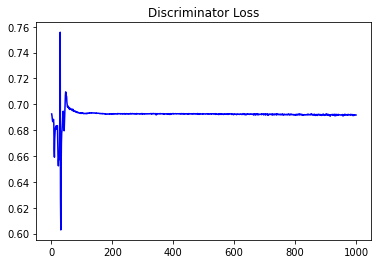

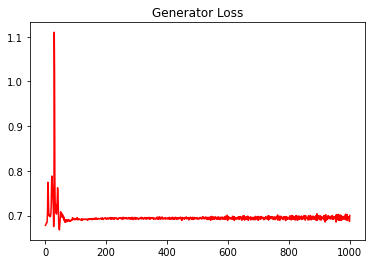

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.305965061338474


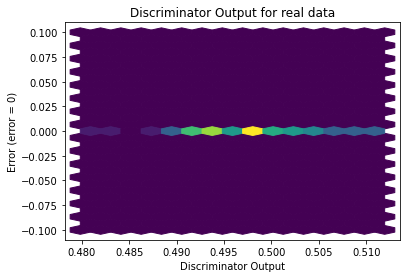

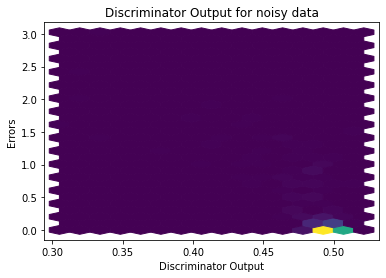

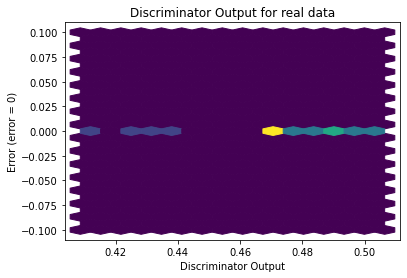

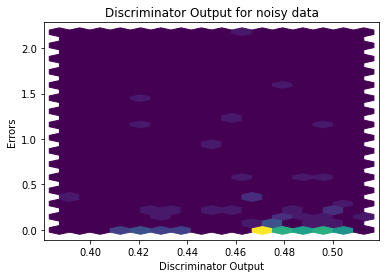

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


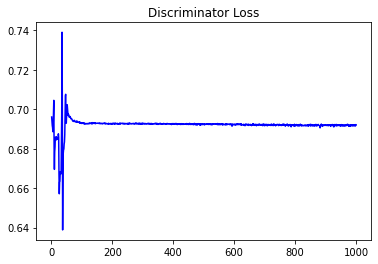

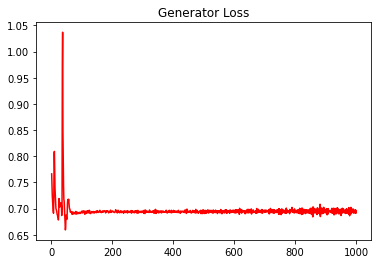

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.278311056205443


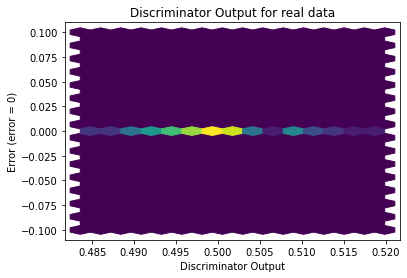

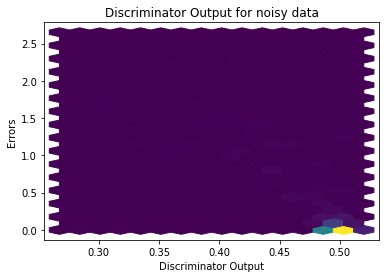

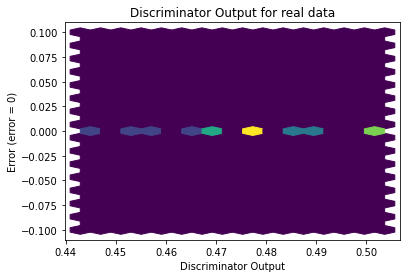

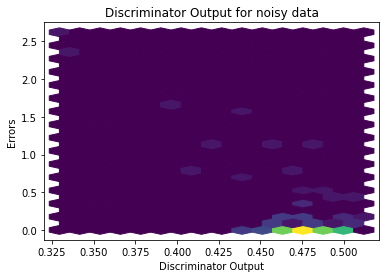

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7534]], requires_grad=True)
